# Classifying Legislative Bills

In this project, I'd like to see whether machine learning algorithms can correctly predict the outcome for a bill introduced in Texas's 85th Legislative Session, i.e. the 2017-2018 session.

I chose this session, because the 86th Legislative Session may still be going on, and I want a sufficient amount of time to pass so that the outcome is correct.

## Loading the bill texts

I had made about 17,000 requests using the Legiscan API before I realized that the monthly limit was only 30,000 requests for a free account.

To deal with the lack of data, I downloaded a dataset with all the bill ID's and outcomes from the 85th Legislative Session, then proportionally sampled ~2,000 bills so that my sample had the same proportion of outcomes as the universe of 85th Legislative Session bills.

With my sample of bill ID's, I then used the API to get the raw text of the introduced bill. 

I stored the bills as a JSON dictionary, which I will now load.

In [1]:
import json
file = r"C:\Users\mwtichen\Documents\Legislative Bills\TX_2017-2018_85th_Legislature_CSV_20170615_0da1ee5521d59a8ecb0be5324c71cbef\TX\2017-2018_85th_Legislature\csv\bills.json"
with open(file, "r") as infile:
    X = json.load(infile)
print(len(X))

1945


Of the 2,000+ bills requested, only 1,945 were usable. If the text contained the phrase "An HTML version of this bill is not available", then I deemed it unusable.

Here's what one of the bills looks like.

In [2]:
print(X["888808"])


td { font-family: Courier, Arial, sans-serif; font-size: 10pt; } table { empty-cells:show; } 


 
85R3374 CAE-F


 


 

		By: Flynn
H.B. No. 45




 


 



 		
			

A BILL TO BE ENTITLED




 
			

AN ACT




 
			
relating to the application of foreign laws and foreign forum 



 
			
selection in this state.



 
			
       BE IT ENACTED BY THE LEGISLATURE OF THE STATE OF TEXAS:



 
			
       SECTION 1.  Title 6, Civil Practice and Remedies Code, is 



 
			
amended by adding Chapter 148 to read as follows:



 
			
CHAPTER 148.  APPLICATION OF FOREIGN LAWS; SELECTION OF FOREIGN 



 
			
FORUM



 
			
       Sec. 148.001.  DEFINITION.  In this chapter, "foreign law" 



 
			
means a law, rule, or legal code of a jurisdiction outside of the 



 
			
states and territories of the United States.  The term does not 



 
			
include a law of a Native American tribe of a state or territory of 



 
			
the United States.



 
			
       Sec. 148.002.  DECISION BASED ON FOREIGN L

## Preparing data

Here are the characters contained in the bill.

In [3]:
X["888808"]

'\ntd { font-family: Courier, Arial, sans-serif; font-size: 10pt; } table { empty-cells:show; } \n\n\n\xa0\n85R3374 CAE-F\n\n\n\xa0\n\n\n\xa0\n\r\n\t\tBy:\xa0Flynn\nH.B.\xa0No.\xa045\n\n\n\n\n\xa0\n\n\n\xa0\n\n\n\n\xa0\t\t\r\n\t\t\t\n\nA BILL TO BE ENTITLED\n\n\n\n\n\xa0\r\n\t\t\t\n\nAN ACT\n\n\n\n\n\xa0\r\n\t\t\t\nrelating to the application of foreign laws and foreign forum \n\n\n\n\xa0\r\n\t\t\t\nselection in this state.\n\n\n\n\xa0\r\n\t\t\t\n\xa0\xa0\xa0\xa0\xa0\xa0\xa0BE IT ENACTED BY THE LEGISLATURE OF THE STATE OF TEXAS:\n\n\n\n\xa0\r\n\t\t\t\n\xa0\xa0\xa0\xa0\xa0\xa0\xa0SECTION\xa01.\xa0\xa0Title 6, Civil Practice and Remedies Code, is \n\n\n\n\xa0\r\n\t\t\t\namended by adding Chapter 148 to read as follows:\n\n\n\n\xa0\r\n\t\t\t\nCHAPTER 148.  APPLICATION OF FOREIGN LAWS; SELECTION OF FOREIGN \n\n\n\n\xa0\r\n\t\t\t\nFORUM\n\n\n\n\xa0\r\n\t\t\t\n\xa0\xa0\xa0\xa0\xa0\xa0\xa0Sec.\xa0148.001.\xa0\xa0DEFINITION.  In this chapter, "foreign law" \n\n\n\n\xa0\r\n\t\t\t\nmeans a law, 

I'm going to get rid of the html tag of each bill, since it's the same for every bill.

In [4]:
clean_X = []
for key in X:
    clean_X.append(X[key].replace("td { font-family: Courier, Arial, sans-serif; font-size: 10pt; } table { empty-cells:show; } ",
                              ""))
print(clean_X[0])





 
85R27015 KSM-D


 


 

		By: Seliger
S.R. No. 712




 


 



 		
			

R E S O L U T I O N




 		
			
       WHEREAS, Fossil fuels, including coal, natural gas, and oil, 



 
			
currently meet more than three quarters of primary global energy 



 
			
demand around the world and in the United States; and



 
			
       WHEREAS, According to the International Energy Agency, under 



 
			
current energy and environmental policies, fossil fuels will 



 
			
continue to play a role of this magnitude for the next quarter 



 
			
century or more; even assuming global adoption of policies 



 
			
consistent with the IEA's "climate-stabilizing" 450 Scenario, more 



 
			
than half of total worldwide and U.S. energy demand would still be 



 
			
met by fossil fuels in 2040; and



 
			
       WHEREAS, The U.S. Department of Energy has reported that 



 
			
"carbon capture, utilization, and storage technologies provide a 



 
			
key pathway to address the urgent U.S

To get the data ready for a machine learning model, I need to create a matrix of term frequencies.

In this matrix, each bill is a row, and each column is a word. A cell in the matrix is the number of times a word appears in a given bill.

I'll use the CountVectorizer function from the Scikit-Learn libary to make this matrix.

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
counts_X = count_vect.fit_transform(clean_X)
print(counts_X.shape)

(1945, 22874)


## Loading the dependent variable

For each bill sampled, I also have the outcome. Like the bills, the outcomes were stored in a JSON dictionary.

In [6]:
file = r"C:\Users\mwtichen\Documents\Legislative Bills\TX_2017-2018_85th_Legislature_CSV_20170615_0da1ee5521d59a8ecb0be5324c71cbef\TX\2017-2018_85th_Legislature\csv\bills_status.json"
with open(file, "r") as infile:
    outcomes = json.load(infile)
print(len(outcomes))

2135


Unlike the bills, I have the outcome for all 2,135 bills sampled, regardless of how useful it was.

Now, I'll create a dependent variable, y, which has the outcome for the 1,945 bills that I have.

In [7]:
y = []
for key in X:
    y.append(outcomes[key])
print(len(y))

1945


Let's check on the distribution of the dependent variable.

In [8]:
dist = {}
for outcome in y:
    key = str(outcome)
    if key in dist:
        dist[key] += 1
    else:
        dist[key] = 1

print(dist)

{'0': 4, '1': 994, '2': 145, '3': 35, '4': 757, '5': 10}


There are 6 outcomes:

* 1 means the bill was introduced.
* 2 means the bill was engrossed.
* 3 means the bill was enrolled.
* 4 means the bill passed.
* 5 means the bill was vetoed.
* 0 means none of the above.

## Model Selection

I'll be separating the data into a training set and a validation set.

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(counts_X, y, random_state = 34, stratify = y)

I the training and validation datasets should have the same distribution of the dependent variable. I'm checking that now.

In [10]:
check = {}
for outcome in y_train:
    key = str(outcome)
    if key in check:
        check[key] += 1
    else:
        check[key] = 1

print(check)

{'1': 745, '3': 26, '4': 567, '2': 109, '0': 3, '5': 8}


To select a model, I'll use Repeated, Stratified K-fold cross validation with K = 3 folds and 10 repeats.

The four models I'm testing are the Multinomial version of Naive Bayes, Complement Naive Bayes, the Decision Tree and Nearest Centroid algorithms.

I won't do any transformation, and train the models on the matrix of counts.

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.neighbors import NearestCentroid
from sklearn.tree import DecisionTreeClassifier

pipelines = []
pipelines.append(('Naive Bayes', Pipeline([('NB', MultinomialNB())] )))
pipelines.append(('Complement Naive Bayes', Pipeline([('CNB', ComplementNB())] )))
pipelines.append(('Decision Tree', Pipeline([('Tree', DecisionTreeClassifier())] )))
pipelines.append(('Nearest Centroid', Pipeline([('NC', NearestCentroid())] )))

results = []
names = []

for name, model in pipelines:
    kfold = RepeatedStratifiedKFold(n_splits = 3, random_state = 34)
    cvresults = cross_val_score(model, X_train, y_train, cv = kfold, scoring = "accuracy")
    results.append(cvresults)
    names.append(name)
    msg ="%s: %f (%f)" % (name, cvresults.mean(), cvresults.std())
    print(msg)

Naive Bayes: 0.764060 (0.007694)
Complement Naive Bayes: 0.763167 (0.009921)
Decision Tree: 0.692040 (0.019394)
Nearest Centroid: 0.371116 (0.093175)


Multinomial Naive Bayes is the best model so far.

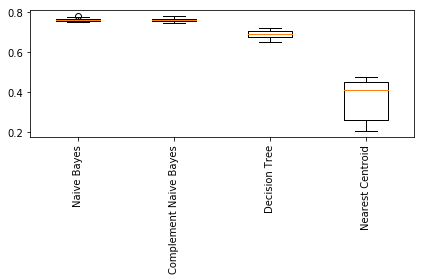

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.boxplot(results, labels = names)
plt.xticks(rotation = 'vertical')
plt.tight_layout()
plt.show()

The term frequency, inverse document frequency (TFIDF) transformation may boost performance.

I'll repeat the testing of the same four models, except this time, I'll transform the count data first in a pipeline.

In [13]:
from sklearn.feature_extraction.text import TfidfTransformer

pipelines = []
pipelines.append(('Naive Bayes', Pipeline([('TFIDF', TfidfTransformer()), ('NB', MultinomialNB())] )))
pipelines.append(('Complement Naive Bayes', Pipeline([('TFIDF', TfidfTransformer()), ('CNB', ComplementNB())] )))
pipelines.append(('Decision Tree', Pipeline([('TFIDF', TfidfTransformer()), ('Tree', DecisionTreeClassifier())] )))
pipelines.append(('Nearest Centroid', Pipeline([('TFIDF', TfidfTransformer()), ('NC', NearestCentroid())] )))

results = []
names = []

for name, model in pipelines:
    kfold = RepeatedStratifiedKFold(n_splits = 3, random_state = 34)
    cvresults = cross_val_score(model, X_train, y_train, cv = kfold, scoring = "accuracy")
    results.append(cvresults)
    names.append(name)
    msg ="%s: %f (%f)" % (name, cvresults.mean(), cvresults.std())
    print(msg)

Naive Bayes: 0.777703 (0.011310)
Complement Naive Bayes: 0.776608 (0.010769)
Decision Tree: 0.678862 (0.017589)
Nearest Centroid: 0.720187 (0.022515)


The transformation boosted the accuracy of Multinomial Naive Bayes by 1 percentage point.

The Nearest Centroid algorithm got a big boost in performance, but the Multinomial Naive Bayes model is still performing best.

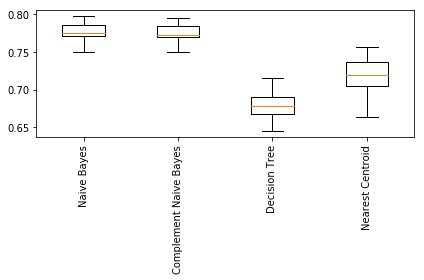

In [14]:
plt.boxplot(results, labels = names)
plt.xticks(rotation = 'vertical')
plt.tight_layout()
plt.show()

## Model Tuning

Like all Naive Bayes algorithms the model uses Bayes Theorem when making predictions. This is 
$P(Y = y | X_1 = x_1 ,..., X_p = X_p) = \frac {P(Y = y)P(X_1 = x_1, ... , X_p = X_p | Y = y)}{P(X_1 = x1, ..., X_p = x_p)}$.

The denominator of the fraction is just a constant, so the outcome is proportional to $P(Y = y)P(X_1 = x_1, ... , X_p = X_p | Y = y)$.

Now, the Naive Bayes algorithm makes the "naive" assumption that the conditional probabilities of the independent variables given the dependent variable, are all independent of another so that $P(X_1 = x_1, ... , X_p = X_p | Y = y) = P(X_1 = x_1 | Y = y) * ... * P(X_p = x_p | Y = y)$.

The Multinomial version of Naive Bayes assumes the dependent variable follows a multinomial distribution.

Using the default method in Scikit-Learn the $P(X_i = x_i | Y = y) = \frac {(\sum_{Y = y}x_i) + \alpha}{\sum_{i=1}^p(\sum_{Y = y}x_i)  + \alpha * k }$, where $k$ is the number of classes in the dependent variable, and $\alpha$ is a parameter that can be tuned.

In [15]:
pipelines = []
pipelines.append(('Naive Bayes alpha = 1.0', Pipeline([('TFIDF', TfidfTransformer()), ('NB', MultinomialNB())] )))
pipelines.append(('Naive Bayes alpha = 0.9', Pipeline([('TFIDF', TfidfTransformer()), ('NB', MultinomialNB(alpha = 0.9))] )))
pipelines.append(('Naive Bayes alpha = 0.8', Pipeline([('TFIDF', TfidfTransformer()), ('NB', MultinomialNB(alpha = 0.8))] )))
pipelines.append(('Naive Bayes alpha = 0.7', Pipeline([('TFIDF', TfidfTransformer()), ('NB', MultinomialNB(alpha = 0.7))] )))
pipelines.append(('Naive Bayes alpha = 0.6', Pipeline([('TFIDF', TfidfTransformer()), ('NB', MultinomialNB(alpha = 0.6))] )))
pipelines.append(('Naive Bayes alpha = 0.5', Pipeline([('TFIDF', TfidfTransformer()), ('NB', MultinomialNB(alpha = 0.5))] )))
pipelines.append(('Naive Bayes alpha = 0.4', Pipeline([('TFIDF', TfidfTransformer()), ('NB', MultinomialNB(alpha = 0.4))] )))
pipelines.append(('Naive Bayes alpha = 0.3', Pipeline([('TFIDF', TfidfTransformer()), ('NB', MultinomialNB(alpha = 0.3))] )))
pipelines.append(('Naive Bayes alpha = 0.2', Pipeline([('TFIDF', TfidfTransformer()), ('NB', MultinomialNB(alpha = 0.2))] )))
pipelines.append(('Naive Bayes alpha = 0.1', Pipeline([('TFIDF', TfidfTransformer()), ('NB', MultinomialNB(alpha = 0.1))] )))

results = []
names = []

for name, model in pipelines:
    kfold = RepeatedStratifiedKFold(n_splits = 3, random_state = 34)
    cvresults = cross_val_score(model, X_train, y_train, cv = kfold, scoring = "accuracy")
    results.append(cvresults)
    names.append(name)
    msg ="%s: %f (%f)" % (name, cvresults.mean(), cvresults.std())
    print(msg)

Naive Bayes alpha = 1.0: 0.777703 (0.011310)
Naive Bayes alpha = 0.9: 0.777634 (0.011384)
Naive Bayes alpha = 0.8: 0.777566 (0.011445)
Naive Bayes alpha = 0.7: 0.777428 (0.011492)
Naive Bayes alpha = 0.6: 0.777222 (0.011322)
Naive Bayes alpha = 0.5: 0.776948 (0.011387)
Naive Bayes alpha = 0.4: 0.776674 (0.011162)
Naive Bayes alpha = 0.3: 0.776399 (0.010892)
Naive Bayes alpha = 0.2: 0.776398 (0.010583)
Naive Bayes alpha = 0.1: 0.775988 (0.010307)


The default value of alpha, 1.0, works best on this dataset.

## Validation

The final model is Multinomial Naive Bayes with $\alpha$ = 1.

Let's see how well this model performs on the validation set.

In [16]:
from sklearn.metrics import confusion_matrix

tfidf = TfidfTransformer()
X_train_tf = tfidf.fit_transform(X_train)
X_validation_tf = tfidf.transform(X_validation)
model = MultinomialNB()
model.fit(X_train_tf, y_train)
predictions = model.predict(X_validation_tf)

print(confusion_matrix(y_validation, predictions))

[[  0   0   0   0   1   0]
 [  0 244   0   0   5   0]
 [  0  36   0   0   0   0]
 [  0   9   0   0   0   0]
 [  0  48   0   0 142   0]
 [  0   2   0   0   0   0]]


Looking at the confusion matrix, the model is mostly predicting whether bills are "Introduced" or "Passed".

Let's see the overall accuracy.

In [17]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_validation, predictions))

0.7926078028747433


79%! That's better than the accuracy measured during model selection and tuning.

## Conclusion

I think I answered my question. Yes, it's possible to correctly predict the outcome of a bill using Machine Learning algorithms.

I found that Multinomial Naive Bayes performs reasonably well on this data.

Still, there are some issues.

1. The dataset is fairly small. With more data, I might be able to build a more accurate model.
2. I only test 4 models. There's probably a way to make a better performing model.
3. I did not test any Deep Learning algorithm, which should outperform most other algorithms on this type of data.

As always, thanks for reading.